In [1]:
from matplotlib import pyplot
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train16 = pd.read_csv("train_2016_v2.csv", parse_dates=["transactiondate"])
print(train16.shape)
train16.tail()

(90275, 3)


,parcelid,logerror,transactiondate
90270,10774160,-0.0356,2016-12-30
90271,12046695,0.0070,2016-12-30
90272,12995401,-0.2679,2016-12-30
90273,11402105,0.0602,2016-12-30
90274,12566293,0.4207,2016-12-30


In [3]:
property16 = pd.read_csv("properties_2016.csv")
print(property16.shape)
property16.tail()

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(2985217, 58)


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
2985212,168176230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985213,14273630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985214,168040630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985215,168040830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985216,168040430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Bathroomcnt, Calculatedbathnbr, Threequarterbathnbr, Fullbathcnt, Roomcnt, Bedroomcnt in Proprerites

- Bathroomcnt :  Number of bathrooms in home including fractional bathrooms
- Calculatedbathnbr :  Number of bathrooms in home including fractional bathroom
- Threequarterbathnbr :  Number of 3/4 bathrooms in house (shower + sink + toilet)
- Fullbathcnt :  Number of full bathrooms (sink, shower + bathtub, and toilet) present in home
- Roomcnt :  Total number of rooms in the principal residence
- Bedroomcnt :  Number of bedrooms in home 

In [4]:
room_bath_prop16 = property16[["bathroomcnt", "calculatedbathnbr", "threequarterbathnbr", "fullbathcnt", "roomcnt", "bedroomcnt"]]
room_bath_prop16.head()

,bathroomcnt,calculatedbathnbr,threequarterbathnbr,fullbathcnt,roomcnt,bedroomcnt
0,0.0,NaN,NaN,NaN,0.0,0.0
1,0.0,NaN,NaN,NaN,0.0,0.0
2,0.0,NaN,NaN,NaN,0.0,0.0
3,0.0,NaN,NaN,NaN,0.0,0.0
4,0.0,NaN,NaN,NaN,0.0,0.0


In [5]:
bath_prop16 = property16[["bathroomcnt","calculatedbathnbr","threequarterbathnbr","fullbathcnt"]]
bath_prop16.head()

,bathroomcnt,calculatedbathnbr,threequarterbathnbr,fullbathcnt
0,0.0,NaN,NaN,NaN
1,0.0,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN
3,0.0,NaN,NaN,NaN
4,0.0,NaN,NaN,NaN


In [6]:
room_prop16 = property16[["roomcnt", "bedroomcnt"]]
room_prop16.head()

,roomcnt,bedroomcnt
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


,column_name,missing_count
5,bedroomcnt,11450
0,bathroomcnt,11462
4,roomcnt,11475
1,calculatedbathnbr,128912
3,fullbathcnt,128912
2,threequarterbathnbr,2673586


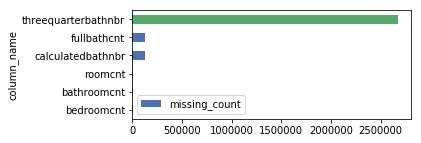

In [7]:
missing_rb16 = room_bath_prop16.isnull().sum(axis=0).reset_index()
missing_rb16.columns = ['column_name', 'missing_count']
missing_rb16 = missing_rb16.sort_values(by='missing_count')

fig, ax2 = pyplot.subplots(figsize=(5,2))
missing_rb16.plot("column_name", "missing_count", kind="barh", color=sns.color_palette("deep", 3), ax=ax2)

missing_rb16

### bathroomcnt 와 calculatedbathnbr 는 사전적 의미도 같고 들어있는 값도 모두 일치 한다.
- bathroomcnt 의 값으로 비어있는 calculatedbathnbr 채울 수 있다.
- 의미상 차이, 값의 차이도 없기 때문에 하나의 value만 사용해도 무방하다.

In [8]:
(property16[~np.isnan(property16["calculatedbathnbr"])]["bathroomcnt"] == property16[~np.isnan(property16["calculatedbathnbr"])]["calculatedbathnbr"]).sum()

2856305

In [9]:
len(property16[~np.isnan(property16["calculatedbathnbr"])]["bathroomcnt"])

2856305

In [10]:
property16[~np.isnan(property16["calculatedbathnbr"])][["bathroomcnt", "calculatedbathnbr"]]. tail()

,bathroomcnt,calculatedbathnbr
2973774,6.0,6.0
2973775,1.0,1.0
2973776,3.0,3.0
2973777,4.0,4.0
2973778,1.0,1.0


In [11]:
property16[["calculatedbathnbr", "fullbathcnt"]].tail()

,calculatedbathnbr,fullbathcnt
2985212,NaN,NaN
2985213,NaN,NaN
2985214,NaN,NaN
2985215,NaN,NaN
2985216,NaN,NaN


### fullbathcnt 와 calculatedbathnbr 의 비어있는 값의 개수는 동일하지만, 모든 값이 같지는 않다.
- 약 채워져 있는 값 2856305 개 중 2544674개의 값이 같다.
- 89%의 값이 서로 같다.
- (서로 비어있는 값 같은 경우, 같다고 가정하고 모델을 만들어봐도 될 것 같다.)

In [12]:
same = (property16[~np.isnan(property16["fullbathcnt"])]["fullbathcnt"] == property16[~np.isnan(property16["calculatedbathnbr"])]["calculatedbathnbr"]).sum()
same

2544674

In [13]:
differ = len(property16[~np.isnan(property16["fullbathcnt"])]["calculatedbathnbr"])
differ

2856305

In [14]:
same / differ

0.890897155590877

#### "threequarterbathnbr", "fullbathcnt" 의 차이는 tub(욕조)가 있고 없고의 차이

In [15]:
bath_prop16[~np.isnan(bath_prop16["fullbathcnt"])][["threequarterbathnbr", "fullbathcnt"]].nunique()

threequarterbathnbr     7
fullbathcnt            20
dtype: int64

In [16]:
bath_prop16[~np.isnan(bath_prop16["fullbathcnt"])][["threequarterbathnbr", "fullbathcnt"]].head()

,threequarterbathnbr,fullbathcnt
19,NaN,2.0
26,NaN,4.0
28,NaN,2.0
29,NaN,4.0
31,NaN,2.0


#### scatter 그래프 fullbathcnt, calculatedbathnbr

Text(0,0.5,'calculatedbathnbr')

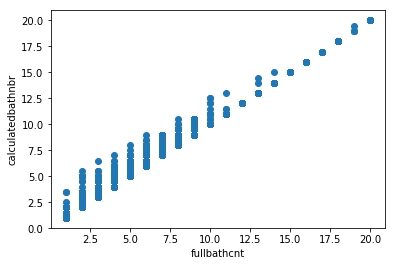

In [27]:
pyplot.scatter(bath_prop16["fullbathcnt"], bath_prop16["calculatedbathnbr"])
plt.xlabel("fullbathcnt")
plt.ylabel("calculatedbathnbr")

#### scatter 그래프 roomcnt, bedroomcnt

Text(0,0.5,'bedroomcnt')

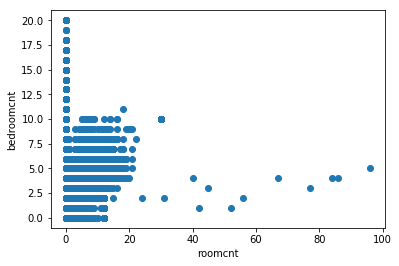

In [18]:
pyplot.scatter(room_prop16["roomcnt"], room_prop16["bedroomcnt"])
plt.xlabel("roomcnt")
plt.ylabel("bedroomcnt")

#### scatter 그래프 roomcnt, bathroomcnt

Text(0,0.5,'bathroomcnt')

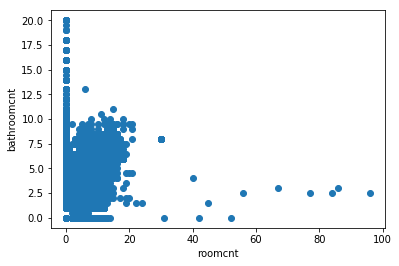

In [19]:
pyplot.scatter(room_bath_prop16["roomcnt"], room_bath_prop16["bathroomcnt"])
plt.xlabel("roomcnt")
plt.ylabel("bathroomcnt")

#### #### scatter 그래프 bedroomcnt, bathroomcnt

Text(0,0.5,'bathroomcnt')

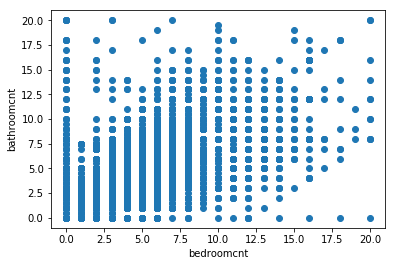

In [20]:
pyplot.scatter(room_bath_prop16["bedroomcnt"], room_bath_prop16["bathroomcnt"])
plt.xlabel("bedroomcnt")
plt.ylabel("bathroomcnt")

#### scatter 그래프 fullbathcnt, bathroomcnt

Text(0,0.5,'bathroomcnt')

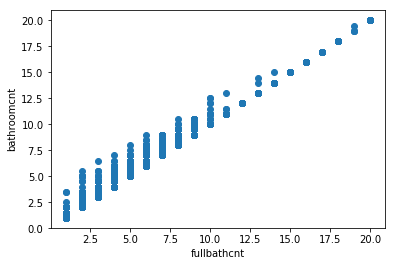

In [21]:
pyplot.scatter(room_bath_prop16["fullbathcnt"], room_bath_prop16["bathroomcnt"])
plt.xlabel("fullbathcnt")
plt.ylabel("bathroomcnt")

#### scatter 그래프 threequarterbathnbr, bathroomcnt

Text(0,0.5,'bathroomcnt')

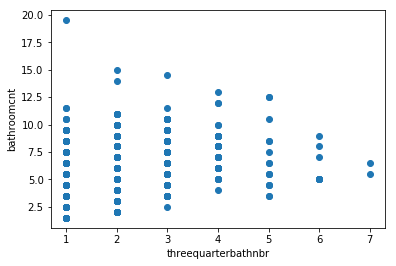

In [22]:
pyplot.scatter(room_bath_prop16["threequarterbathnbr"], room_bath_prop16["bathroomcnt"])
plt.xlabel("threequarterbathnbr")
plt.ylabel("bathroomcnt")

## Room & Bath & Bed with Logerror

In [71]:
new_train16 = train16.set_index('parcelid').join(property16.set_index('parcelid'))
new_train16.head()

,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
parcelid,,,,,,,,,,,,,,,,,,,,,
10711738,0.0276,2016-08-02,1.0,NaN,NaN,3.0,4.0,NaN,4.0,3.0,...,NaN,NaN,245180.0,567112.0,2015.0,321932.0,7219.18,NaN,NaN,6.037113e+13
10711755,-0.0182,2016-08-02,1.0,NaN,NaN,3.0,3.0,NaN,4.0,3.0,...,NaN,NaN,254691.0,459844.0,2015.0,205153.0,6901.09,NaN,NaN,6.037113e+13
10711805,-0.1009,2016-05-03,1.0,NaN,NaN,2.0,3.0,NaN,4.0,2.0,...,NaN,NaN,235114.0,384787.0,2015.0,149673.0,4876.61,NaN,NaN,6.037113e+13
10711816,-0.0121,2016-04-05,1.0,NaN,NaN,2.0,4.0,NaN,4.0,2.0,...,NaN,NaN,262309.0,437176.0,2015.0,174867.0,5560.07,NaN,NaN,6.037113e+13
10711858,-0.0481,2016-07-15,1.0,NaN,NaN,2.0,4.0,NaN,4.0,2.0,...,NaN,NaN,232037.0,382055.0,2015.0,150018.0,4878.25,NaN,NaN,6.037113e+13


In [72]:
new_t = new_train16[["bathroomcnt", "calculatedbathnbr", "threequarterbathnbr", "fullbathcnt", "roomcnt", "bedroomcnt", "logerror"]]
new_t.head()

,bathroomcnt,calculatedbathnbr,threequarterbathnbr,fullbathcnt,roomcnt,bedroomcnt,logerror
parcelid,,,,,,,
10711738,3.0,3.0,NaN,3.0,0.0,4.0,0.0276
10711755,3.0,3.0,NaN,3.0,0.0,3.0,-0.0182
10711805,2.0,2.0,NaN,2.0,0.0,3.0,-0.1009
10711816,2.0,2.0,NaN,2.0,0.0,4.0,-0.0121
10711858,2.0,2.0,NaN,2.0,0.0,4.0,-0.0481


,column_name,missing_count
0,bathroomcnt,0
2,threequarterbathnbr,0
3,fullbathcnt,0
4,roomcnt,0
5,bedroomcnt,0
6,logerror,0
1,calculatedbathnbr,1182


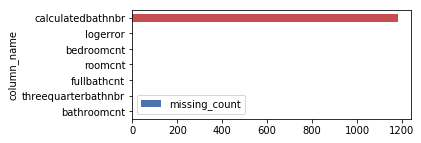

In [81]:
missing_rb16 = new_t.isnull().sum(axis=0).reset_index()
missing_rb16.columns = ['column_name', 'missing_count']
missing_rb16 = missing_rb16.sort_values(by='missing_count')

fig, ax2 = pyplot.subplots(figsize=(5,2))
missing_rb16.plot("column_name", "missing_count", kind="barh", color=sns.color_palette("deep", 3), ax=ax2)

missing_rb16

### "fullbathcnt", "bathroomcnt" 그래프상 선형관계 이므로 bathroomcnt를 이용해서 fullbathcnt의 빈값 1182 개를 채울 수 있음

In [74]:
ls = new_t[np.isnan(new_t["fullbathcnt"])]["bathroomcnt"]
new_t.loc[np.isnan(new_t["fullbathcnt"]), "fullbathcnt"] = ls

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [75]:
new_t[np.isnan(new_t["fullbathcnt"])]

,bathroomcnt,calculatedbathnbr,threequarterbathnbr,fullbathcnt,roomcnt,bedroomcnt,logerror
parcelid,,,,,,,


In [76]:
new_t[["fullbathcnt", "bathroomcnt"]].head()

,fullbathcnt,bathroomcnt
parcelid,,
10711738,3.0,3.0
10711755,3.0,3.0
10711805,2.0,2.0
10711816,2.0,2.0
10711858,2.0,2.0


### "bathroomcnt", "calculatedbathnbr" 의미도 같고, 채워져 있는 값이 모두 같으므로 calculatedbathnbr를 모두 채우고 사용하거나, 둘 중 하나만 사용해도 무방함

In [79]:
new_t["threequarterbathnbr"].value_counts()

1.0    11912
2.0       90
3.0        6
4.0        1
Name: threequarterbathnbr, dtype: int64

#### 빈 값 1.0 으로 모두 채우기

In [80]:
new_t.loc[np.isnan(new_t["threequarterbathnbr"]), "threequarterbathnbr"] = 1.0
new_t[np.isnan(new_t["threequarterbathnbr"])]

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,bathroomcnt,calculatedbathnbr,threequarterbathnbr,fullbathcnt,roomcnt,bedroomcnt,logerror
parcelid,,,,,,,


## model

In [85]:
dfX0 = new_t[["bathroomcnt", "threequarterbathnbr", "fullbathcnt", "roomcnt", "bedroomcnt"]]
dfX = sm.add_constant(dfX0)
dfy = new_t[["logerror"]]
df = pd.concat([dfX, dfy], axis=1)

In [86]:
model = sm.OLS(dfy, dfX)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               logerror   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     17.30
Date:                Tue, 03 Jul 2018   Prob (F-statistic):           3.75e-17
Time:                        15:25:13   Log-Likelihood:                 36779.
No. Observations:               90275   AIC:                        -7.355e+04
Df Residuals:                   90269   BIC:                        -7.349e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0399    

In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(dfX.values, i) for i in range(dfX.shape[1])]
vif["features"] = dfX.columns
vif

,VIF Factor,features
0,767.600271,const
1,38.869632,bathroomcnt
2,1.044437,threequarterbathnbr
3,38.847926,fullbathcnt
4,1.146148,roomcnt
5,1.790198,bedroomcnt


In [88]:
model2 = sm.OLS.from_formula("logerror ~ scale(threequarterbathnbr) + scale(roomcnt) + scale(bedroomcnt)", data=df)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:               logerror   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     22.65
Date:                Tue, 03 Jul 2018   Prob (F-statistic):           1.19e-14
Time:                        15:33:42   Log-Likelihood:                 36769.
No. Observations:               90275   AIC:                        -7.353e+04
Df Residuals:                   90271   BIC:                        -7.349e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           